In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 25

Step 1: Read in data<br>
using TF Learn's built in function to load MNIST data to the folder data/mnist

In [3]:
mnist = input_data.read_data_sets('data/mnist', one_hot=True) 

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


Step 2: create placeholders for features and labels<br>
each image in the MNIST data is of shape 28*28 = 784<br>
therefore, each image is represented with a 1x784 tensor<br>
there are 10 classes for each image, corresponding to digits 0 - 9.<br>
Features are of the type float, and labels are of the type int<br>

In [4]:
X = tf.placeholder(tf.float32, (None, 28*28), name='X')
y = tf.placeholder(tf.int32, (None, 10), name='labels')

Step 3: create weights and bias<br>
weights and biases are initialized to 0<br>
shape of w depends on the dimension of X and Y so that Y = X * w + b<br>
shape of b depends on Y<br>

In [5]:
w = tf.Variable(tf.zeros(shape=(784, 10)), name='weights')
b = tf.Variable(tf.zeros(shape=(10)), name='bias')

Step 4: build model<br>
the model that returns the logits.<br>
this logits will be later passed through softmax layer<br>
to get the probability distribution of possible label of the image<br>
DO NOT DO SOFTMAX HERE<br>

In [6]:
# Y_pred = tf.matmul(X, w) + b
# logits = tf.log(Y_pred/(1 - Y_pred))

logits = tf.matmul(X, w) + b

Step 5: define loss function<br>
use cross entropy loss of the real labels with the softmax of logits<br>
use the method:<br>
tf.nn.softmax_cross_entropy_with_logits(logits, Y)<br>
then use tf.reduce_mean to get the mean loss of the batch<br>

In [7]:
loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y, name = "loss_by_batch")
loss_mean = tf.reduce_mean(loss, name = "loss_mean")

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_mean, name='gd_opt')

Step 6: define training op<br>
using gradient descent to minimize loss

In [8]:
loss_vals = list()

with tf.Session() as sess:
    start_time = time.time()
    sess.run(tf.global_variables_initializer()) 
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss_mean], feed_dict={X:X_batch, y:Y_batch})
            total_loss += np.mean(loss_batch)
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
        loss_vals.append(total_loss/n_batches)

    print('Total time: {0} seconds'.format(time.time() - start_time))

    print('Optimization Finished!') # should be around 0.35 after 25 epochs

    # test the model
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, y:Y_batch})[0] 
        total_correct_preds += accuracy_batch   
    
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

Average loss epoch 0: 1.289247228826954
Average loss epoch 1: 0.7326632453289343
Average loss epoch 2: 0.6005994785915721
Average loss epoch 3: 0.536723520511236
Average loss epoch 4: 0.4974669332687671
Average loss epoch 5: 0.4712043560885049
Average loss epoch 6: 0.45168163726379823
Average loss epoch 7: 0.435129282496748
Average loss epoch 8: 0.4237392353011178
Average loss epoch 9: 0.41330530364196616
Average loss epoch 10: 0.40505275484565256
Average loss epoch 11: 0.3964152603577345
Average loss epoch 12: 0.39000752366784014
Average loss epoch 13: 0.3848630868957871
Average loss epoch 14: 0.3787784602814343
Average loss epoch 15: 0.37477837238973116
Average loss epoch 16: 0.3712200540484804
Average loss epoch 17: 0.3660969918980187
Average loss epoch 18: 0.3623124370069215
Average loss epoch 19: 0.35925058607177024
Average loss epoch 20: 0.3564852144404169
Average loss epoch 21: 0.3547947747515632
Average loss epoch 22: 0.35109126098922916
Average loss epoch 23: 0.348881915802166

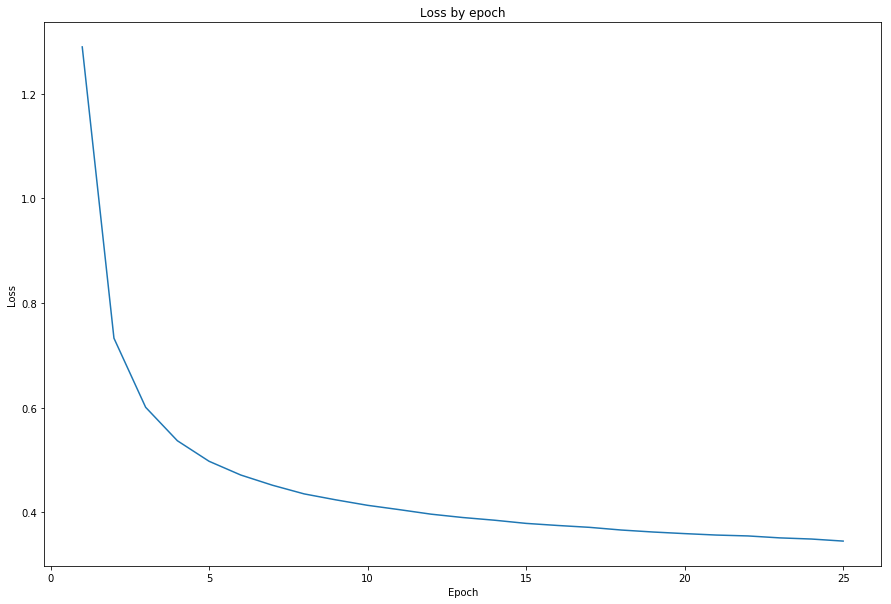

In [15]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1, n_epochs+1), loss_vals)
plt.title('Loss by epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')